In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

Ch08, P.10

In [3]:
mydata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3600/cartype1.csv")
x=mydata.iloc[:,5:15].to_numpy()
n=x.shape[0]
y=mydata.Price.to_numpy()

In [4]:
ixtx=np.linalg.inv(x.T @ x)
beta=ixtx @ x.T @ y
print(beta)
yhat=x @ beta
res=y-yhat
sse=np.sum(res**2)
print(sse)

[13831.          1113.         -3502.75         162.75
 -5682.5        -3223.5         1160.03571429  6757.5
 -1683.5          480.83333333]
94999431.34523809


In [5]:
x1=mydata.iloc[:,5:11].to_numpy()
ixtx=np.linalg.inv(x1.T @ x1)
beta1=ixtx @ x1.T @ y
yhat=x1 @ beta1
res=y-yhat
sse1=np.sum(res**2)
ssi=sse1-sse
print(ssi)

72636763.29206562


In [6]:
sst=sum((y-y.mean())**2)
ssab=sst-sse-ssi
dfab=2+5-1
dfi=(2-1)*(5-1)
dfe=n-2*5
dft=n-1
msi=ssi/dfi
mse=sse/dfe
fRatio=msi/mse
pvalue=1-stats.f(dfi,dfe).cdf(fRatio)

In [7]:
print (f"{'source':<12} {'ss':>12} {'df':>3} {'ms':>12} {'F':>5} {'p-value':>7}")
print (f"{'main':<12} {ssab:12.2f} {dfab:>3}")
print (f"{'interaction':<12} {ssi:12.2f} {dfi:>3} {msi:12.2f} {fRatio:5.2f} {pvalue:7.4f}")
print (f"{'error':<12} {sse:12.2f} {dfe:>3} {mse:12.2f}")
print (f"{'total':<12} {sst:12.2f} {dft:>3}")

source                 ss  df           ms     F p-value
main         505998900.91   6
interaction   72636763.29   4  18159190.82  4.78  0.0053
error         94999431.35  25   3799977.25
total        673635095.54  34


In [8]:
mu=beta[0]
a=np.append(beta[1],0)
b=np.append(beta[2:6],0)
g=np.r_[np.append(beta[6:10],0),np.zeros(5)].reshape(2,5)

In [9]:
means=mu+np.add.outer(a,b)+g
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
means

array([[ 12601.29,  21864.25,  7578.00,  12201.33,  14944.00],
       [ 10328.25,  13993.75,  8148.50,  10607.50,  13831.00]])

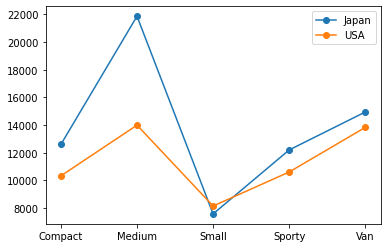

In [10]:
lbl=['Compact', 'Medium', 'Small', 'Sporty','Van']
plt.plot(lbl, means[0,:],label='Japan',marker='o')
plt.plot(lbl, means[1,:],label='USA',marker='o')
plt.legend(loc="upper right")
plt.show()

P.13

In [48]:
theta=means.reshape(-1)
nij=mydata.groupby(['Country','Type']).Type.count().to_numpy()
theta,nij

(array([ 12601.29,  21864.25,  7578.00,  12201.33,  14944.00,  10328.25,
         13993.75,  8148.50,  10607.50,  13831.00]),
 array([7, 4, 6, 3, 1, 4, 4, 2, 2, 2]))

In [44]:
a=np.array([1,0,0,0,0,-1,0,0,0,0])
l=a @ theta
sel=np.sqrt(mse*sum(a**2/nij))
myt=stats.t(dfe).ppf(.975)
ci=[l-myt*sel,l+myt*sel]
l,sel,ci

(2273.0357142857174,
 1221.8216755540645,
 [-243.35313110750576, 4789.424559678941])

In [45]:
a=np.array([[1,0,0,0,0,-1,0,0,0,0],[0,1,0,0,0,0,-1,0,0,0],[0,0,1,0,0,0,0,-1,0,0],[0,0,0,1,0,0,0,0,-1,0],[0,0,0,0,1,0,0,0,0,-1]])
l=a @ theta
sel=np.sqrt(mse*np.sum(a**2/nij,axis=1))
ci=np.c_[l-myt*sel,l+myt*sel]
l,sel,ci

(array([ 2273.04,  7870.50, -570.50,  1593.83,  1113.00]),
 array([ 1221.82,  1378.40,  1591.64,  1779.51,  2387.46]),
 array([[-243.35,  4789.42],
        [ 5031.63,  10709.37],
        [-3848.54,  2707.54],
        [-2071.13,  5258.80],
        [-3804.07,  6030.07]]))